In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")

In [3]:
class LinearRegression:
  def __init__(self, lr):
    self.lr = lr

  def fit(self, X, Y, num_iteration):
    self.num_iteration = num_iteration
    X = np.array(X).reshape(1, -1) # DATA
    Y = np.array(Y).reshape(1, -1) # TARGET
    N = X.shape[1]
    self.weight = np.random.normal(0, 1, (1, 1))
    self.bias = np.random.rand(1)
    for i in range(self.num_iteration):
      pred = np.matmul(self.weight, X) + self.bias
      self.delta_weight = ((pred - Y) * X).mean()
      self.delta_bias = (pred - Y).mean()
      self.weight -= self.lr * self.delta_weight
      self.bias -= self.lr * self.delta_bias

  def predict(self, X):
    product = np.matmul(self.weight, np.array(X).reshape(1, -1)) + self.bias
    return product.reshape(-1)

  def fit_with_MLE(self, X, Y):
    X = np.array(X).reshape(-1, 1) # 내적 후 (1, 1)의 결과값을 얻기 위해
    Y = np.array(Y).reshape(-1, 1) # X와 Y 모두 (-1, 1)로 변경
    self.weight = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), Y)

  def predict_with_MLE(self, X):
    product = np.matmul(self.weight, np.array(X).reshape(1, -1))
    return product.reshape(-1)

  def min_max_norm(self, data_list):
    normalized_data_list = []
    min = data_list.min()
    max = data_list.max()
    for data in data_list:
      normalized_data = (data - min) / (max - min)
      normalized_data_list.append(normalized_data)
    return normalized_data_list

  def zscore_norm(self, data_list):
    normalized_data_list = []
    mean = np.mean(data_list)
    std = np.std(data_list)
    for data in data_list:
      normalized_data = (data - mean) / std
      normalized_data_list.append(normalized_data)
    return normalized_data_list

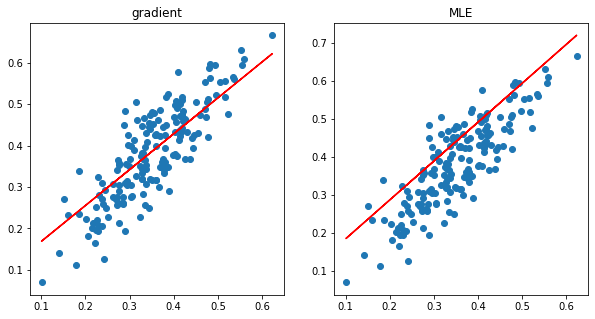

In [23]:
reg = LinearRegression(lr = 0.1)
x = reg.min_max_norm(data['Weight'])
y = reg.min_max_norm(data['Height'])

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title("gradient")
plt.scatter(x[-180:], y[-180:])
reg.fit(x[:-180], y[:-180], num_iteration=50)
pred = reg.predict(x[-180:])
plt.plot(x[-180:], pred, 'red')

plt.subplot(1, 2, 2)
plt.title("MLE")
plt.scatter(x[-180:], y[-180:])
reg.fit_with_MLE(x[:-180], y[:-180])
pred_with_MLE = reg.predict(x[-180:])
plt.plot(x[-180:], pred_with_MLE, 'red')

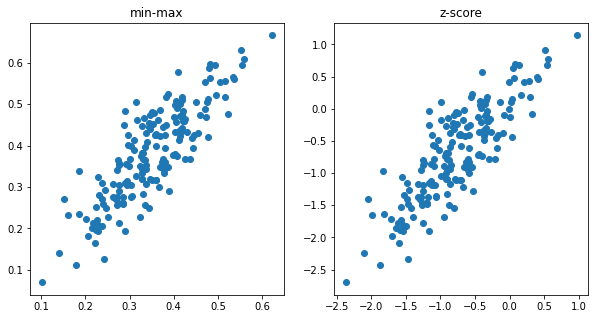

In [19]:
x1 = reg.min_max_norm(data['Weight'])
y1 = reg.min_max_norm(data['Height'])
x2 = reg.zscore_norm(data['Weight'])
y2 = reg.zscore_norm(data['Height'])

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title("min-max")
plt.scatter(x1[-180:], y1[-180:])

plt.subplot(1, 2, 2)
plt.title("z-score")
plt.scatter(x2[-180:], y2[-180:])